<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [22]:
#!pip install seaborn

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
%matplotlib inline

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [ ]:
#from pyodide.http import pyfetch

#async def download(url, filename):
#    response = await pyfetch(url)
#    if response.status == 200:
#        with open(filename, "wb") as f:
#            f.write(await response.bytes())

In [ ]:
#file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [3]:
#await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [26]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [160]:
# Print the datatype of all columns.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print(df.dtypes)


Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
MgrIdiot                   object
MgrMoney                   object
MgrWant                    object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal     

In [72]:
# Find the number of unique values for column 'ConvertedComp'
df['ConvertedComp'].nunique()

3515

In [139]:
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


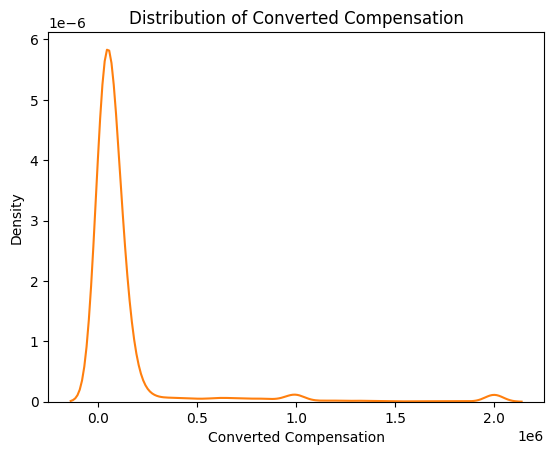

In [84]:
# your code goes here
# Plot the KDE plot
sns.kdeplot(df['ConvertedComp'], fill=False)
plt.xlabel('Converted Compensation')
plt.ylabel('Density')
plt.title('Distribution of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


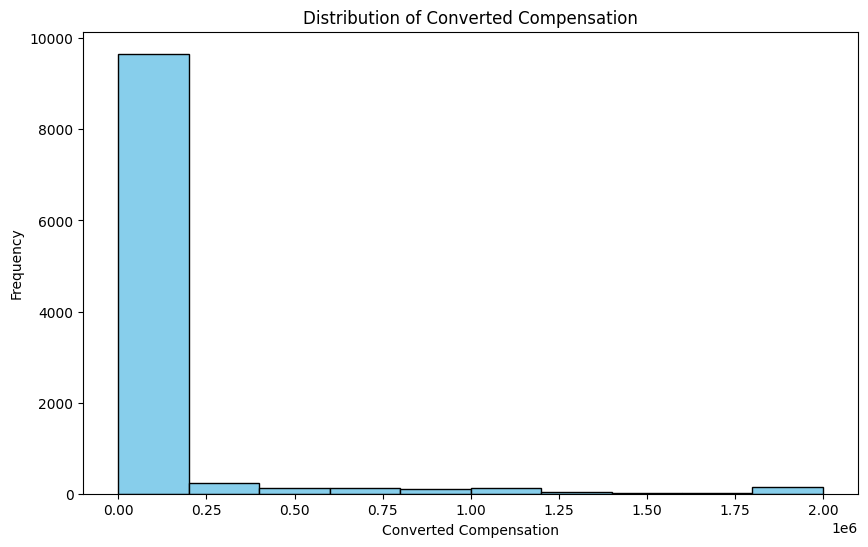

In [76]:
# your code goes here
plt.figure(figsize=(10, 6))
# Plot the histogram
plt.hist(x=df['ConvertedComp'], color='skyblue', edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [123]:
# your code goes here
print('Median of column ConvertedComp:',df['ConvertedComp'].median())

Median of column ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [121]:
# your code goes here
print('Number of responders identified as Man:',df['Gender'].value_counts()['Man'])

Number of responders identified as Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [119]:
# your code goes here
woman = df[df['Gender'] == 'Woman']
print('Median ConvertedConp of responders identified as Woman:',woman['ConvertedComp'].median())

Median ConvertedConp of responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [98]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


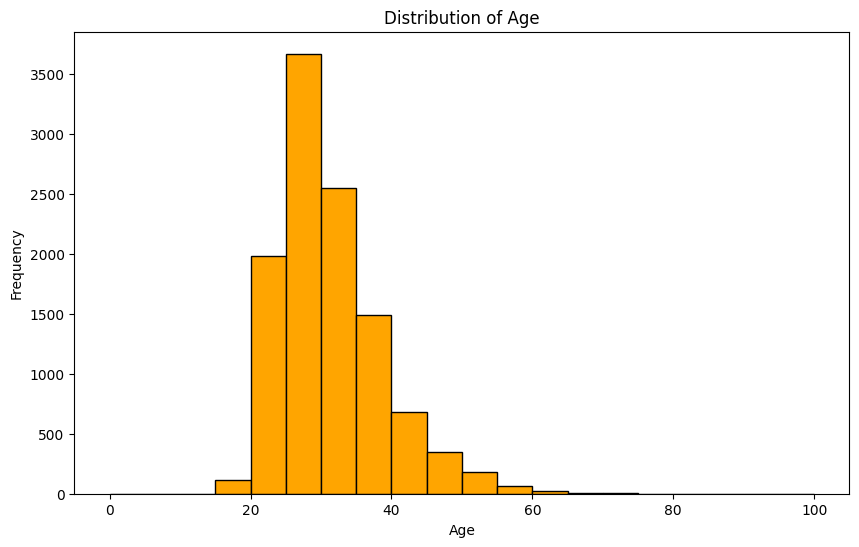

In [180]:
# your code goes here

plt.figure(figsize=(10, 6))
bins = range(0, 101, 5) #define bin size = 5 for each bin

# Plot the histogram
plt.hist(x=df['Age'], bins=bins, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


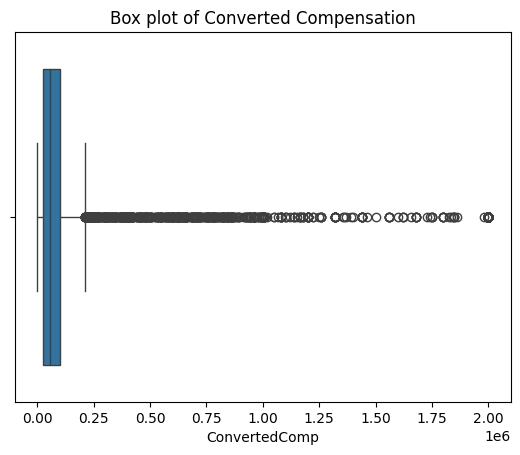

In [111]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'], data=df)
plt.title('Box plot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [113]:
# your code goes here

# Calculate the interquartile range (IQR)
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

print("Interquartile Range (IQR):", iqr)

Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [117]:
# your code goes here

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)

Lower bound: -82830.0
Upper bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [137]:
# your code goes here

# Create bool variable 'outliers' which returns True when below condition is met, otherwise returns False.
outliers = ((df["ConvertedComp"] < lower_bound) | (df["ConvertedComp"] > upper_bound))

# Only count the outliers with 'True' value
print('Number of outliers in ConvertedComp column:', outliers.value_counts()[True]) 

Number of outliers in ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [141]:
# your code goes here
# Filter out outliers
df_new = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_new.shape

(9703, 85)

In [190]:
df_new['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [194]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation between 'Age' and other numerical columns
numerical_df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
